# Deep Learning for CV

In [35]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


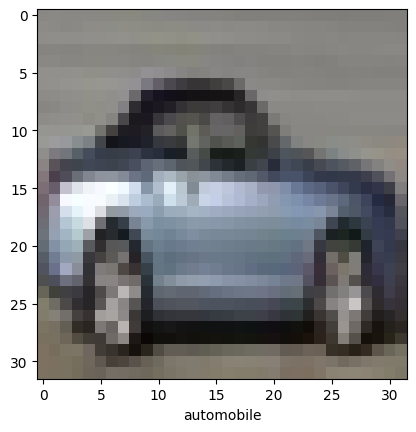

In [8]:
IMG_INDEX = np.random.randint(0, len(train_images))

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## Arquitetura de CNN
Uma arquitetura comum para uma CNN (Rede Neural Convolucional) consiste em uma pilha de camadas Conv2D e MaxPooling2D, seguidas por algumas camadas densamente conectadas. A ideia é que a pilha de camadas de convolução e pooling extraia as características da imagem. Em seguida, essas características são achatadas (flattened) e alimentadas em camadas densamente conectadas, que determinam a classe de uma imagem com base na presença de determinadas características.

Começaremos construindo a Base Convolucional.

In [9]:
model = models.Sequential()

# Adiciona uma camada convolucional 2D, que aplica 32 filtros (ou kernels), cada um de tamanho 3x3, na imagem de entrada.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Aplica a operação de max pooling com uma janela de 2x2, reduzindo pela metade as dimensões espaciais da imagem.
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

- **Camada 1**

A forma de entrada dos nossos dados será (32, 32, 3), e vamos processar 32 filtros de tamanho 3x3 sobre esses dados. Também aplicaremos a função de ativação ReLU ao resultado de cada operação de convolução para introduzir não-linearidade e destacar padrões importantes.

- **Camada 2**

Nesta camada, aplicaremos a operação de max pooling usando amostras 2x2 com um stride de 2. Isso reduz as dimensões espaciais pela metade, mantendo apenas as características mais importantes.

- **Outras Camadas**

O próximo conjunto de camadas realiza operações semelhantes, mas toma como entrada o feature map da camada anterior. Nessas camadas, aumentamos a quantidade de filtros de 32 para 64, o que é viável porque as dimensões espaciais da imagem vão diminuindo ao longo das camadas, permitindo adicionar maior profundidade computacionalmente.

---

Em uma camada convolucional, cada filtro aprende a identificar uma característica distinta, como:

- Bordas verticais
- Bordas horizontais
- Bordas diagonais
- Texturas específicas (como pontos ou listras)
- Gradientes de cor ou intensidade

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

## Adicionando as camadas densas

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

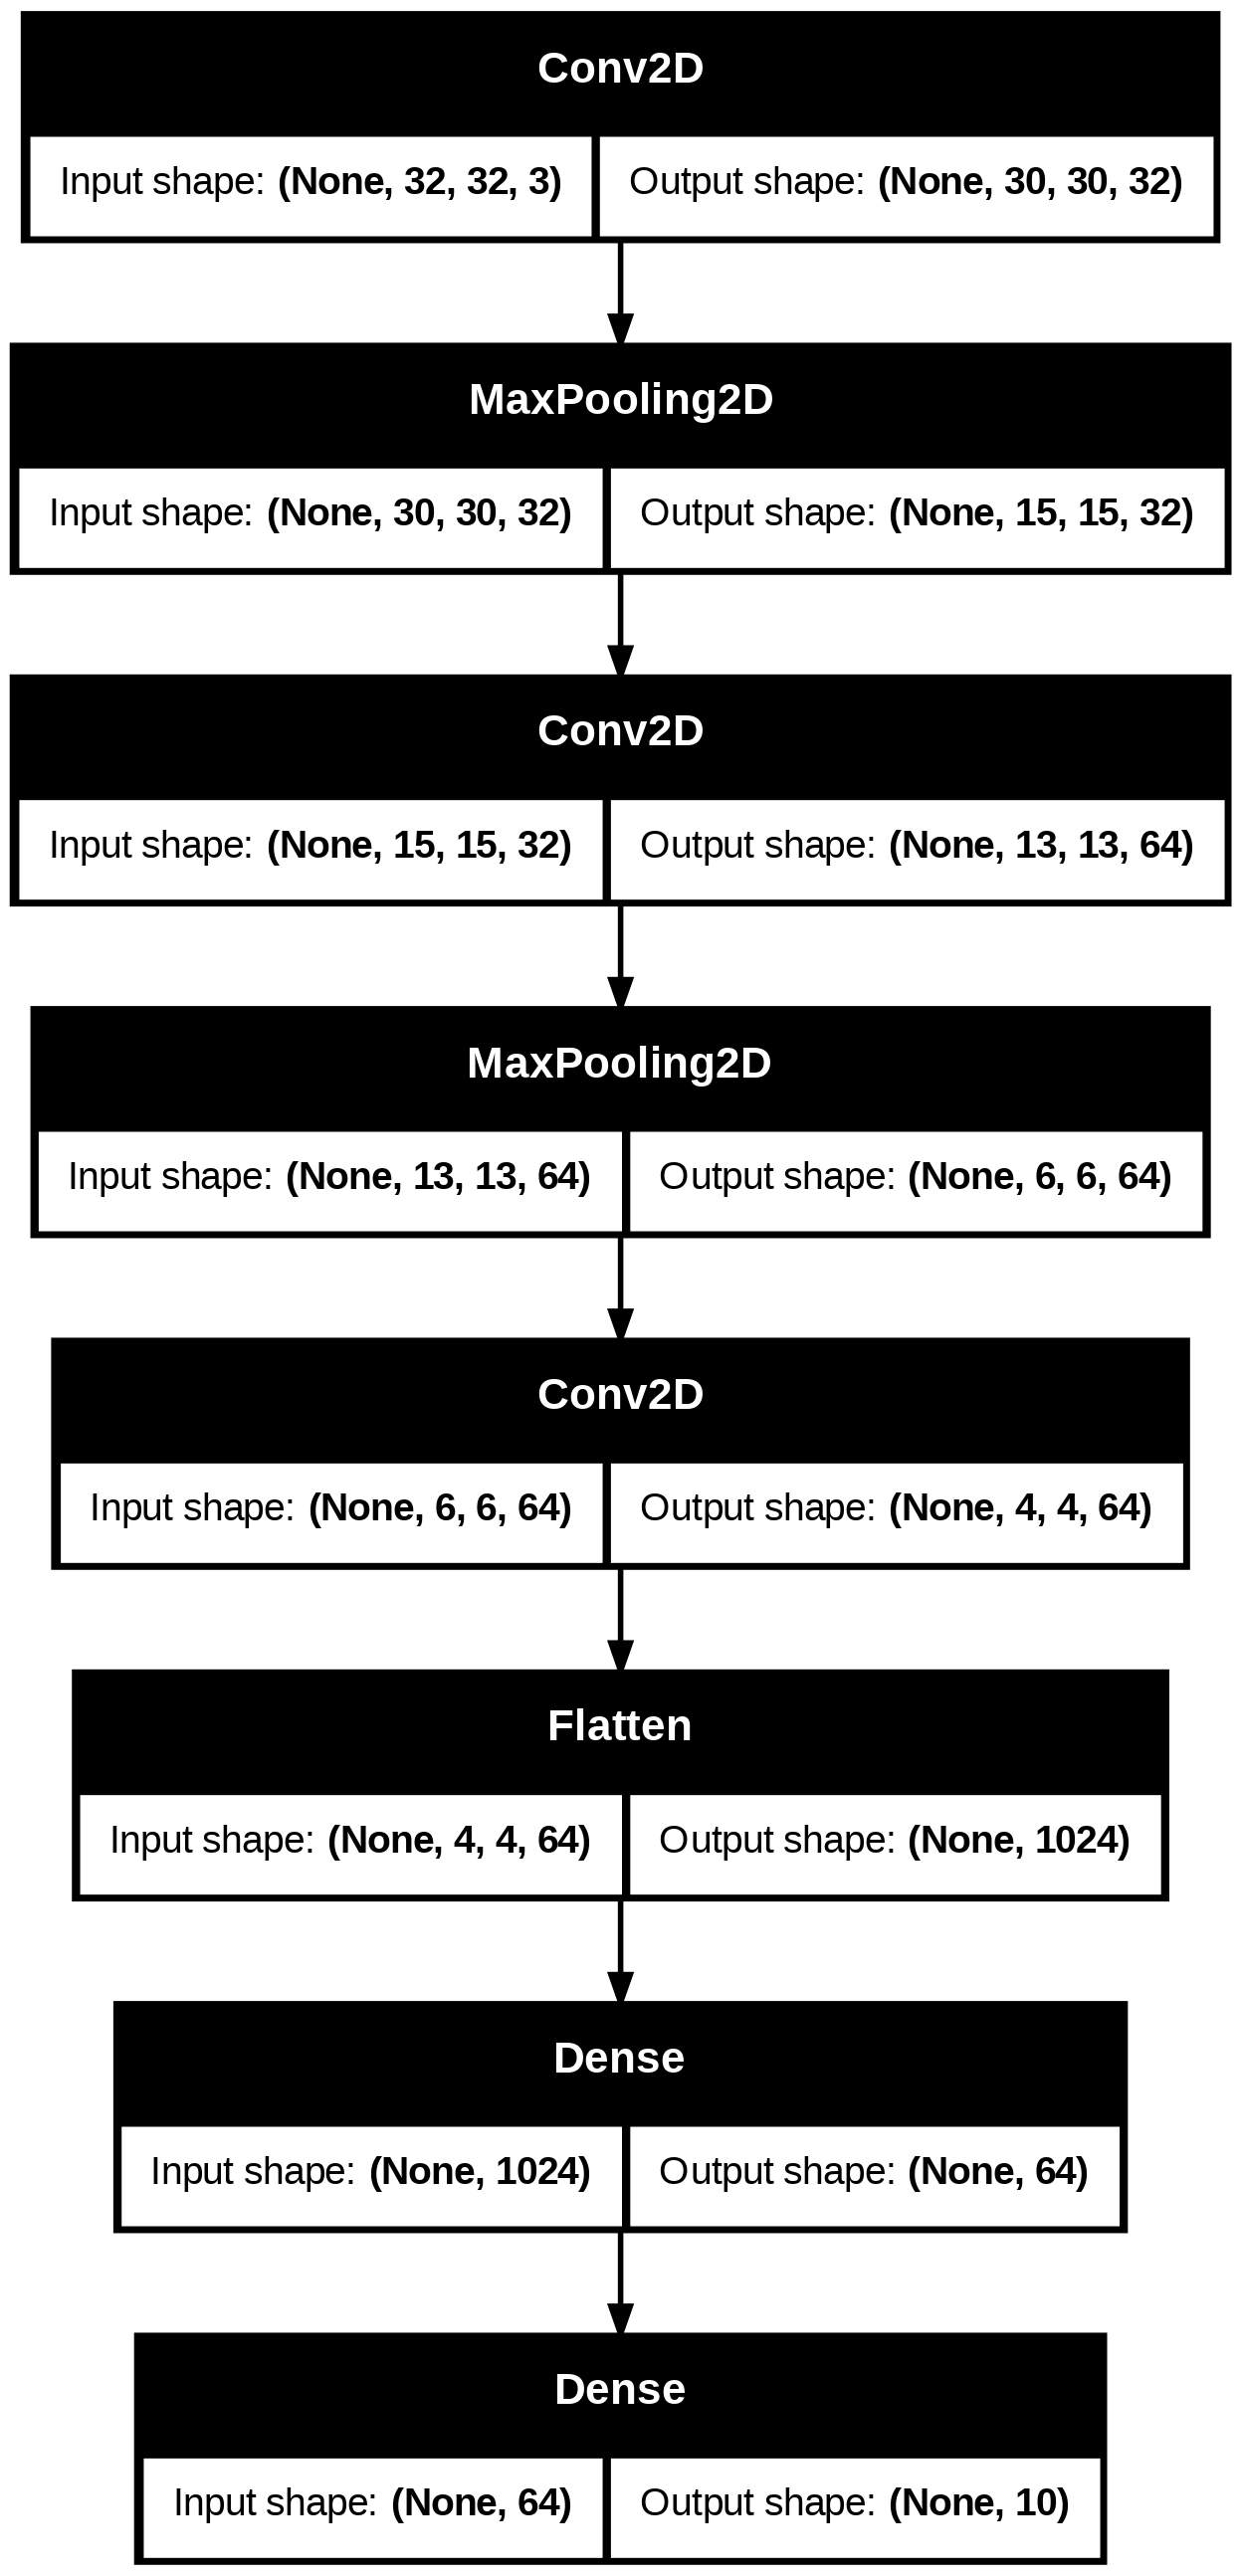

In [15]:
plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3474 - loss: 1.7718 - val_accuracy: 0.5192 - val_loss: 1.3448
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.5506 - loss: 1.2748 - val_accuracy: 0.5883 - val_loss: 1.1575
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6090 - loss: 1.1069 - val_accuracy: 0.6142 - val_loss: 1.0945
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.6443 - loss: 1.0067 - val_accuracy: 0.6495 - val_loss: 0.9954
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.6716 - loss: 0.9268 - val_accuracy: 0.6664 - val_loss: 0.9662
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.6937 - loss: 0.8707 - val_accuracy: 0.6853 - val_loss: 0.9219
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.7146 - loss: 0.8123 - val_accuracy: 0.6674 - val_loss: 0.9590
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7248 -

## Avaliando o modelo

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.6920 - loss: 0.8938
0.6919999718666077


Os dados são poucos para melhorar a performance.

## Tratando falta de Dados

###Data Augmentation (Aumento do conjunto de Dados)

Para evitar o overfitting e criar um conjunto de dados maior a partir de um menor, podemos usar uma técnica chamada aumento de dados. Isso envolve a aplicação de transformações aleatórias nas imagens, permitindo que o modelo generalize melhor. Essas transformações podem incluir compressões, rotações, estiramentos e até mesmo alterações de cor.



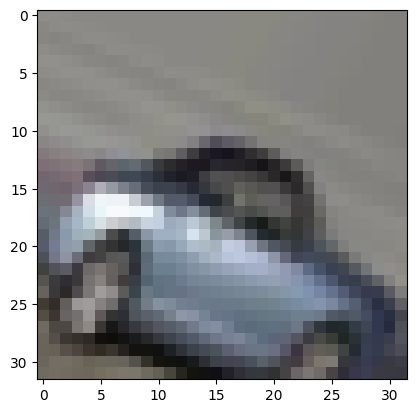

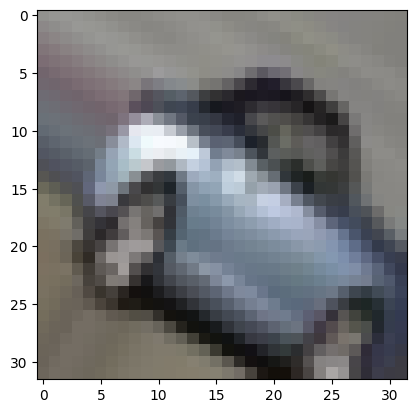

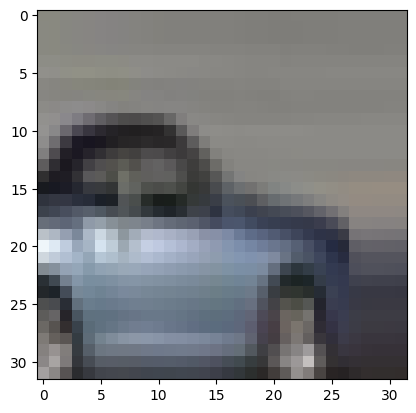

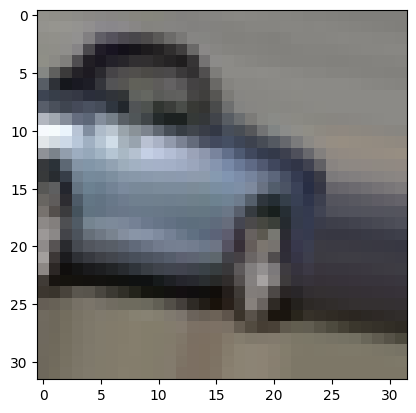

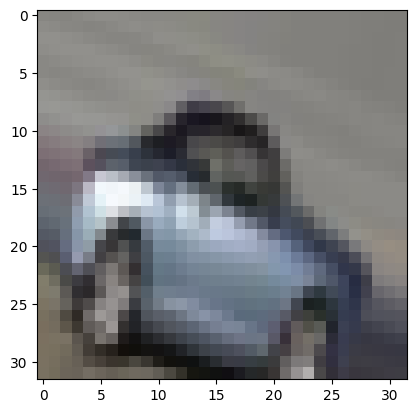

In [23]:
from tensorflow.keras.preprocessing import image  # Importa ferramentas para manipulação de imagens
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importa o gerador para aumento de dados em imagens

# Cria um gerador de imagens que aplica transformações aleatórias para aumentar os dados
datagen = ImageDataGenerator(
    rotation_range=40,         # Rotaciona a imagem aleatoriamente em até 40 graus
    width_shift_range=0.2,     # Desloca a imagem horizontalmente em até 20% da largura
    height_shift_range=0.2,    # Desloca a imagem verticalmente em até 20% da altura
    shear_range=0.2,           # Aplica uma transformação de cisalhamento em até 20%
    zoom_range=0.2,            # Aplica zoom aleatório na imagem em até 20%
    horizontal_flip=True,      # Espelha a imagem horizontalmente de forma aleatória
    fill_mode='nearest'        # Preenche pixels vazios com o valor dos pixels mais próximos
)

# Seleciona uma imagem do conjunto de treinamento para realizar as transformações
IMG_INDEX_2 = np.random.randint(0, len(train_images))
test_img = train_images[IMG_INDEX]  # Seleciona a 21ª imagem do conjunto de treinamento

# Converte a imagem para um array numpy, necessário para o gerador
img = image.img_to_array(test_img)

# Redimensiona a imagem para adicionar uma dimensão extra, necessária para o gerador
# Essa dimensão adicional representa o número de imagens (batch) e facilita o processamento
img = img.reshape((1,) + img.shape)

# Inicializa um contador para mostrar um número limitado de imagens transformadas
i = 0

# Loop para gerar e mostrar imagens transformadas
# O método .flow() cria um fluxo infinito de imagens transformadas
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # Salva as imagens no diretório atual com prefixo 'test'
    plt.figure(i)  # Cria uma nova figura para cada imagem transformada
    plot = plt.imshow(image.img_to_array(batch[0]))  # Converte a imagem transformada para exibição
    i += 1  # Incrementa o contador
    if i > 4:  # Limita a exibição a 4 imagens transformadas
        break  # Encerra o loop após mostrar 4 imagens

plt.show()  # Exibe as imagens transformadas

In [26]:
# Criação do gerador de dados de treinamento com aumento de dados
train_datagen = ImageDataGenerator(
    rotation_range=40,           # Rotaciona a imagem em até 40 graus
    width_shift_range=0.2,       # Desloca horizontalmente em até 20%
    height_shift_range=0.2,      # Desloca verticalmente em até 20%
    shear_range=0.2,             # Aplica cisalhamento em até 20%
    zoom_range=0.2,              # Zoom aleatório em até 20%
    horizontal_flip=True,        # Espelhamento horizontal aleatório
    fill_mode='nearest'          # Preenchimento de pixels vazios
)

# Geração dos dados aumentados a partir dos arrays `train_images` e `train_labels`
train_generator = train_datagen.flow(
    train_images,      # Dados de imagem de treinamento
    train_labels,      # Rótulos de treinamento
    batch_size=64      # Tamanho do lote; ajuste conforme necessário
)

### Código final

In [33]:
# Configuração do gerador de dados com aumento de dados
train_datagen_augmented = ImageDataGenerator(
    rotation_range=40,         # Rotaciona a imagem aleatoriamente em até 40 graus
    width_shift_range=0.2,     # Desloca a imagem horizontalmente em até 20%
    height_shift_range=0.2,    # Desloca a imagem verticalmente em até 20%
    shear_range=0.2,           # Aplica cisalhamento em até 20%
    zoom_range=0.2,            # Aplica zoom aleatório na imagem em até 20%
    horizontal_flip=True,      # Espelha a imagem horizontalmente de forma aleatória
    fill_mode='nearest'        # Preenche pixels vazios com o valor dos pixels mais próximos
)

# Gerador sem aumento para as imagens originais
train_datagen_original = ImageDataGenerator()  # Sem transformações

# Criando geradores de dados
train_generator_augmented = train_datagen_augmented.flow(
    train_images, train_labels, batch_size=32, seed=42
)
train_generator_original = train_datagen_original.flow(
    train_images, train_labels, batch_size=32, seed=42
)

# Função para alternar entre batches de imagens originais e aumentadas
def combined_generator(original_gen, augmented_gen):
    while True:
        # Gera e retorna um batch de imagens originais
        original_batch = next(original_gen)
        yield original_batch
        # Gera e retorna um batch de imagens aumentadas
        augmented_batch = next(augmented_gen)
        yield augmented_batch

# Definindo o número de steps por época, para cobrir tanto originais quanto aumentadas
steps_per_epoch = 2 * (len(train_images) // 32)

In [34]:
# Treinamento do modelo usando o gerador de dados
history = model.fit(train_images, train_labels,
                    epochs=10, steps_per_epoch = steps_per_epoch,
                    validation_data=(test_images, test_labels))

Epoch 1/10
2940/3124 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7277 - loss: 0.7712

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3124/3124 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.7276 - loss: 0.7713 - val_accuracy: 0.6525 - val_loss: 1.0327
Epoch 2/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - accuracy: 0.7449 - loss: 0.7269 - val_accuracy: 0.6837 - val_loss: 0.9500
Epoch 3/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.7612 - loss: 0.6825 - val_accuracy: 0.6983 - val_loss: 0.8942
Epoch 4/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.7689 - loss: 0.6627 - val_accuracy: 0.6965 - val_loss: 0.9155
Epoch 5/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.7751 - loss: 0.6387 - val_accuracy: 0.7018 - val_loss: 0.9039
Epoch 6/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.7804 - loss: 0.6185 - val_accuracy: 0.6893 - val_loss: 0.9486
Epoch 7/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.7909 - loss: 0.5919 - val_accuracy: 0.6987 - val_loss: 0.9354
Epoch 8/10
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.7969 - loss: 0.57

In [40]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 5s - 16ms/step - accuracy: 0.7024 - loss: 0.9545


[0.9545151591300964, 0.7024000287055969]